In [20]:
import numpy as np
import matplotlib.pyplot as plt
def create_spiral_data(samples, classes):
    X = np.zeros((samples*classes, 2))
    y = np.zeros(samples*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(samples*class_number, samples*(class_number+1))
        r = np.linspace(0.0, 1, samples)
        t = np.linspace(class_number*4, (class_number+1)*4, samples) + np.random.randn(samples)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X, y

In [54]:
num_classes=3
X,y=create_spiral_data(10000,num_classes)

In [55]:
X.shape,y.shape

((30000, 2), (30000,))

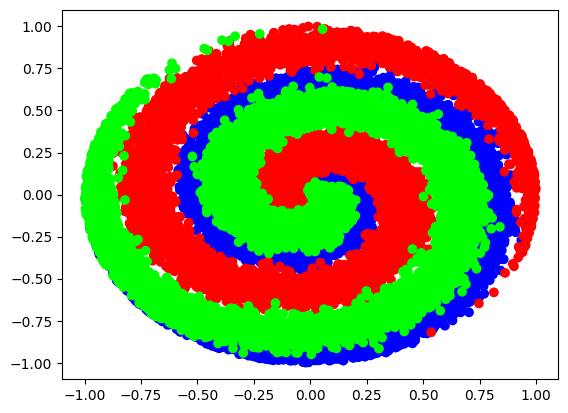

In [56]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='brg')
plt.show()

In [208]:
import torch
from torch.nn import Module,Sequential,Linear,ReLU,Sigmoid,CrossEntropyLoss
from torch.optim import SGD,RMSprop,AdamW
import torch
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

In [226]:
class ClassificationModel(Module):
    def __init__(self,inputs,outputs):
        super().__init__()
        self.network= Sequential(Linear(inputs,128),ReLU(),Linear(128,128),Linear(128,outputs))
    def forward(self,inputs):
        return self.network(inputs)

In [227]:
X_tensor=torch.from_numpy(X).to(torch.float32).to(device)
Y_tensor=torch.from_numpy(y).to(device)
X_tensor.dtype
loss_curves={'SGD':[],'rmsProp':[]}

In [ ]:
model=ClassificationModel(2,3).to(device)
criterion=CrossEntropyLoss()
sgd_optimizer=SGD(params=model.parameters(),lr=0.001)
epochs=5000
for epoch in range(epochs):
    pred=model(X_tensor)
    loss=criterion(pred,Y_tensor)
    if epoch%100==0:
        # print(f"Loss : {loss}")
        acc=(pred.argmax(dim=1)==Y_tensor).sum()/pred.shape[0]
        # print(f"accuracy: {acc}")
        loss_curves.get('SGD').append({'epoch':epoch,'loss':loss,'acc':acc})
    sgd_optimizer.zero_grad()
    loss.backward()
    sgd_optimizer.step()

In [ ]:
model=ClassificationModel(2,3).to(device)
criterion=CrossEntropyLoss()
rms_prop=RMSprop(params=model.parameters(),lr=0.001)
epochs=5000
for epoch in range(epochs):
    pred=model(X_tensor)
    loss=criterion(pred,Y_tensor)
    if epoch%100==0:
        # print(f"Loss : {loss}")
        acc=(pred.argmax(dim=1)==Y_tensor).sum()/pred.shape[0]
        # print(f"accuracy: {acc}")
        loss_curves.get('rmsProp').append({'epoch':epoch,'loss':loss,'acc':acc})
    rms_prop.zero_grad()
    loss.backward()
    rms_prop.step()

In [230]:
import pandas as pd
sgd_df=pd.DataFrame(loss_curves['SGD'])
print(sgd_df.head())
sgd_values=sgd_df.map(lambda x: x.item() if torch.is_tensor(x) else x).values
rms_df=pd.DataFrame(loss_curves['rmsProp'])
print(rms_df.head())
rms_values=rms_df.map(lambda x: x.item() if torch.is_tensor(x) else x).values

   epoch                                               loss  \
0      0  tensor(1.1017, device='mps:0', grad_fn=<NllLos...   
1    100  tensor(1.0996, device='mps:0', grad_fn=<NllLos...   
2    200  tensor(1.0979, device='mps:0', grad_fn=<NllLos...   
3    300  tensor(1.0964, device='mps:0', grad_fn=<NllLos...   
4    400  tensor(1.0951, device='mps:0', grad_fn=<NllLos...   

                              acc  
0  tensor(0.3442, device='mps:0')  
1  tensor(0.3457, device='mps:0')  
2  tensor(0.3691, device='mps:0')  
3  tensor(0.3847, device='mps:0')  
4  tensor(0.3894, device='mps:0')  
   epoch                                               loss  \
0      0  tensor(1.1359, device='mps:0', grad_fn=<NllLos...   
1    100  tensor(0.9606, device='mps:0', grad_fn=<NllLos...   
2    200  tensor(0.8714, device='mps:0', grad_fn=<NllLos...   
3    300  tensor(0.7661, device='mps:0', grad_fn=<NllLos...   
4    400  tensor(0.6886, device='mps:0', grad_fn=<NllLos...   

                          

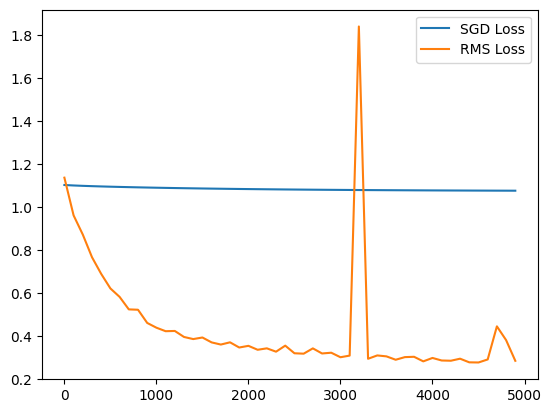

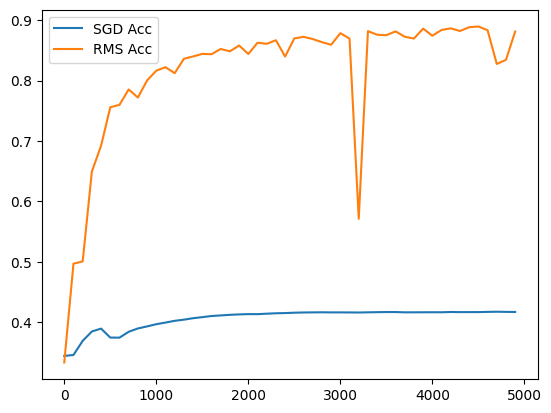

In [231]:
plt.plot(sgd_values[:,0],sgd_values[:,1],label='SGD Loss')
plt.plot(rms_values[:,0],rms_values[:,1],label='RMS Loss')
plt.legend()
plt.show()
plt.plot(sgd_values[:,0],sgd_values[:,2],label='SGD Acc')
plt.plot(rms_values[:,0],rms_values[:,2],label='RMS Acc')
plt.legend()
plt.show()

In [232]:
# Rms has momentum paramter along with adaptive learning rate leading to faster convergence
# but spikes at some points - todo
from sklearn.model_selection import KFold
kf=KFold(n_splits=5,random_state=42,shuffle=True)

In [260]:
for train_idx,eval_idx in kf.split(X):
    print(train_idx,eval_idx)

[    0     1     2 ... 29996 29997 29998] [    6     7    17 ... 29989 29995 29999]
[    0     1     2 ... 29996 29998 29999] [    3    19    23 ... 29983 29986 29997]
[    1     2     3 ... 29997 29998 29999] [    0     4     5 ... 29991 29993 29994]
[    0     3     4 ... 29997 29998 29999] [    1     2    10 ... 29953 29967 29992]
[    0     1     2 ... 29995 29997 29999] [    9    11    13 ... 29987 29996 29998]
